<a href="https://colab.research.google.com/github/JBattana/338-Assignments/blob/main/338_Assignment_12_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

from collections import Counter

from nltk.tokenize import word_tokenize

# Download the 'punkt' resource
import nltk
nltk.download('punkt')

# Assuming 'text_data' is a pandas DataFrame column containing text
text_data = pd.read_csv('/content/sentimentdataset.csv')['Text']
text_data

# Tokenize and count words
word_counts = Counter(word_tokenize(' '.join(text_data.astype(str))))
word_counts

# # Display top N most common words
top_words = word_counts.most_common(25)
top_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('the', 808),
 ('.', 784),
 ('of', 623),
 ('a', 621),
 (',', 517),
 ('in', 261),
 ('to', 133),
 ('#', 128),
 ('and', 111),
 ('with', 107),
 ('for', 99),
 ('on', 91),
 ('!', 84),
 ('by', 70),
 ("'s", 65),
 ('through', 52),
 ('an', 49),
 ('my', 41),
 ('at', 40),
 ('new', 39),
 ('each', 39),
 ('In', 39),
 ('that', 38),
 ('life', 37),
 ('as', 36)]

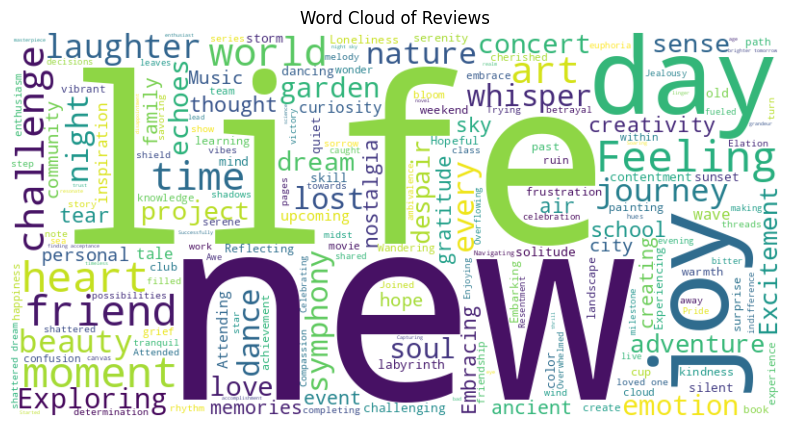

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(text_data.astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [15]:
!pip install emoji
import emoji

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Extract emojis from each review
text_data['emojis'] = text_data.apply(lambda x: extract_emojis(str(x)))

# Count emojis
emoji_counts = Counter(''.join(text_data['emojis']))

# Display top emojis
top_emojis = emoji_counts.most_common(10)
print("Top 10 emojis:")
for emoji, count in top_emojis:
    print(f"{emoji}: {count}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.6 MB/s eta 0:00:00
Top 10 emojis:
💪: 3
🐾: 2
❤: 2
🎉: 1
🎨: 1
🎂: 1
🐶: 1


In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    # Ensure the input is a string before analysis
    if not isinstance(text, str):
        text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to each review
text_data['sentiment_score'] = text_data.apply(get_sentiment)

# Categorize sentiment
text_data['sentiment'] = text_data['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display sentiment distribution
print(text_data['sentiment'].value_counts(normalize=True))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text
positive    0.633015
negative    0.257844
neutral     0.109141
Name: proportion, dtype: float64
